# Introduction to Qiskit

In [1]:
from qiskit import QuantumCircuit

## Create Quantum Circuit

qiskit.QuantumCircuit is the foundational building block of the qiskit library and will be used to design the Quantum Circuits.


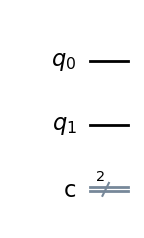

In [2]:
# Create a circuit with 2 qubits and 2 classical bits. Initialized to 0.
circuit = QuantumCircuit(2, 2)

# Use MatPlotLib backend to draw circuits
circuit.draw(output='mpl')

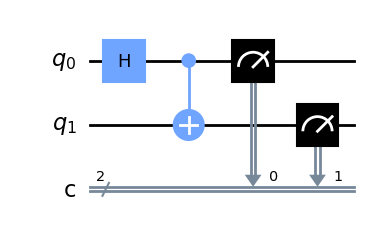

In [3]:
# Add a Hadamard gate on qubit 0
circuit.h(0)

# Add a Controlled-Not (CNOT) gate connecting qubits 0 (control) to 1 (target)
circuit.cx(0, 1)

# Measure quantum bit(s) into classical bit(s)
circuit.measure([0,1], [0,1])
# First list specifies order of qubits
# Second list specifies order of classical bits

circuit.draw(output='mpl')

## Simulate Quantum Circuit

qiskit.transpile is a function that takes a quantum circuit and returns a new circuit optimized for the backend.
It essentially converts the given set of gate operations into another set that is optimized for a specific algorithm and backend.

qiskit_aer.QasmSimulator is the main Qiskit AER backend to simulate the noise models of Quantum Circuit.
It is especially useful for circuits that measure Qubits into Bits.

In [4]:
from qiskit import transpile
from qiskit_aer import QasmSimulator
from qiskit.visualization import plot_histogram

In [5]:
# Initialize a QASM simulator
simulator = QasmSimulator()

# Transpile circuit to simulator
compiled_circuit = transpile(circuit, simulator)

In [6]:
# Run simulation
job = simulator.run(compiled_circuit, shots=1000)

# Get result
result = job.result()

# Get the counts of each result
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'11': 517, '00': 483}


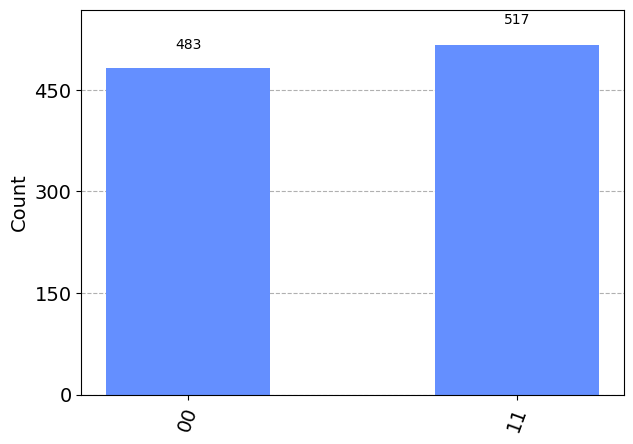

In [7]:
plot_histogram(counts)

**Note: Running this simulation multiple times may not yield the same results.**

This is because Quantum Systems are really sensitive to noise.
2 common sources of noise are: **gate-infidelity** and **decoherence**.